<a href="https://colab.research.google.com/github/itsyoru/airline-sentiment-analysis/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Tweets.csv to Tweets.csv


In [ ]:
tweets = pd.read_csv("Tweets.csv")

In [ ]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets.shape

(14640, 15)

In [ ]:
%matplotlib inline

<Axes: xlabel='airline_sentiment', ylabel='count'>

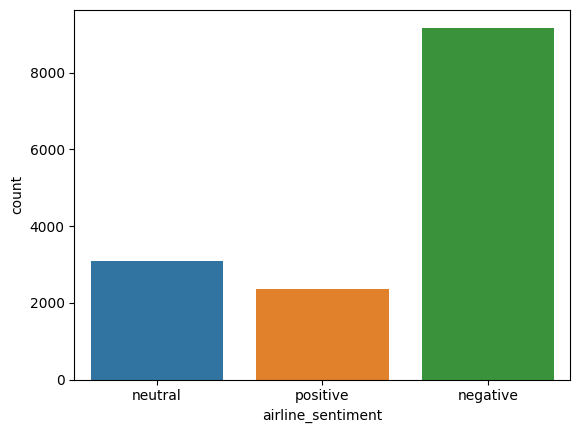

In [ ]:
import seaborn as sns
sns.countplot(x='airline_sentiment', data=tweets)

<Axes: xlabel='airline', ylabel='count'>

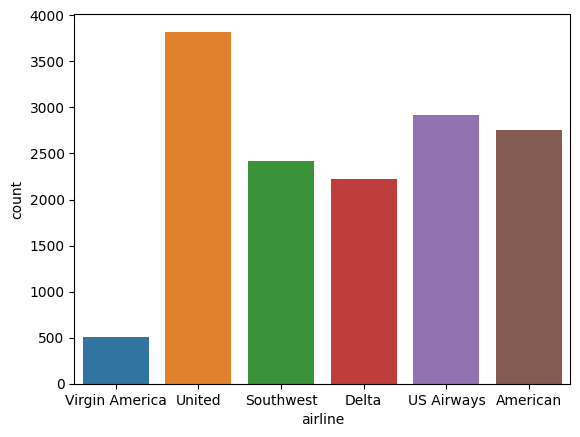

In [ ]:
sns.countplot(x='airline', data=tweets)

<Axes: xlabel='airline', ylabel='count'>

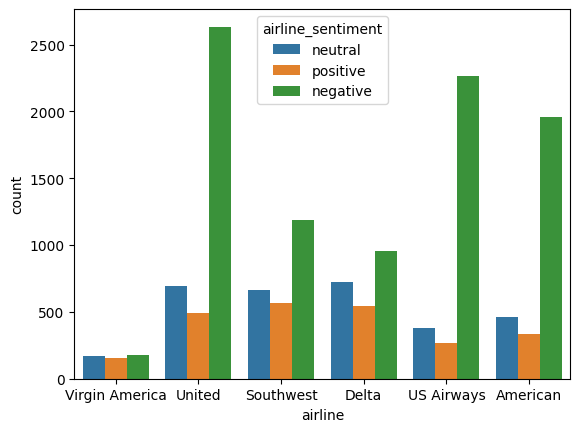

In [ ]:
 sns.countplot(x='airline', hue="airline_sentiment", data=tweets)

In [ ]:
X = tweets.iloc[:, 10].values
y = tweets.iloc[:, 1].values

In [ ]:
processed_tweets = []

for tweet in range(0, len(X)):
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)

    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()

    processed_tweets.append(processed_tweet)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(processed_tweets).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1715  109   46]
 [ 328  239   47]
 [ 134   64  246]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.58      0.39      0.47       614
    positive       0.73      0.55      0.63       444

    accuracy                           0.75      2928
   macro avg       0.70      0.62      0.65      2928
weighted avg       0.73      0.75      0.73      2928

0.7513661202185792
